In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
autos = pd.read_csv(r"C:\Users\hp\Desktop\autos.csv", encoding='Latin-1')

In [4]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
# Cleaninglean column headers
column_dict ={'dateCrawled': 
'date_crawled','offerType':'offer_type',
'vehicleType':'vehicle_type', 'yearOfRegistration':
'registration_year',
 'powerPS': 'power_ps',
'monthOfRegistration':'registration_month',
 'fuelType':'fuel_type', 'notRepairedDamage':
'unrepaired_damage',
 'dateCreated':'ad_created', 'nrOfPictures':'nr_of_pictures', 
 'postalCode':'postal_code', 'lastSeen':'last_seen'}
autos = autos.rename(columns=column_dict)

In [6]:
autos.describe(include='all')


,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [7]:
print(autos['price'].value_counts())

$0          1421
$500         781
$1,500       734
$2,500       643
$1,000       639
            ... 
$250,000       1
$19,399        1
$20,290        1
$31,600        1
$51,500        1
Name: price, Length: 2357, dtype: int64


In [8]:
# removing unwanted characters
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['price'] = autos['price'].astype(float)

In [9]:
# storing price values as float type
autos['price'] = autos['price'].astype(float)
autos['price'].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

In [10]:
print(autos['odometer'].value_counts())

150,000km    32424
125,000km     5170
100,000km     2169
90,000km      1757
80,000km      1436
70,000km      1230
60,000km      1164
50,000km      1027
5,000km        967
40,000km       819
30,000km       789
20,000km       784
10,000km       264
Name: odometer, dtype: int64


In [11]:
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')
autos['odometer'] = autos['odometer'].astype(float)

In [12]:
autos['odometer'].head()

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer, dtype: float64

In [13]:
autos.rename(columns={'odometer':'odometer_km'}, inplace=True)
print(autos.columns)

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


In [14]:
autos['price'].unique().shape
(2357,)
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [15]:
# checking abnormally low values
price_count = autos['price'].value_counts()
price_count.sort_index().head(5)

0.0    1421
1.0     156
2.0       3
3.0       1
5.0       2
Name: price, dtype: int64

In [16]:
# checking abnormally high values
price_count.sort_index(ascending=False).head(5)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
Name: price, dtype: int64

In [17]:
# removing values under 300
autos.loc[autos['price'] <= 300, 'price'] = np.nan
# checking that outliers are removed
price_count = autos['price'].value_counts()
price_count.sort_index().head(5)

310.0     1
320.0    12
325.0     5
329.0     2
330.0     8
Name: price, dtype: int64

In [18]:
# removing values over 100000
autos.loc[autos['price'] >= 100000, 'price'] = np.nan
# checking that outliers are removed
price_count = autos['price'].value_counts()
price_count.sort_index(ascending=False).head(5)

99900.0    2
99000.0    2
98500.0    1
94999.0    1
93911.0    1
Name: price, dtype: int64

In [19]:
autos['odometer_km'].unique().shape
(13,)
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [20]:
date_c_num = autos['date_crawled'].str[:10]
# utilizing the first 10 characters of the string, 
# which contains the date in a useable format.
date_c_num.head()

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object

In [21]:

# installing cleaned data back into the original dataset
autos['date_crawled'] = date_c_num
autos['date_crawled'].head()

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object

In [22]:
seen_c_num = autos['last_seen'].str[:10]
# utilizing the first 10 characters of the string
# which contains the date in a useable format.
seen_c_num.head()

0    2016-04-06
1    2016-04-06
2    2016-04-06
3    2016-03-15
4    2016-04-01
Name: last_seen, dtype: object

In [23]:
# installing cleaned data back into the original dataset
autos['last_seen'] = seen_c_num
print(autos['last_seen'].head())

0    2016-04-06
1    2016-04-06
2    2016-04-06
3    2016-03-15
4    2016-04-01
Name: last_seen, dtype: object


In [24]:
autos['registration_year'].describe()


count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [25]:
ad_c_num = autos['ad_created'].str[:10]
# utilizing the first 10 characters of the string
# which contains the date in a useable format.
ad_c_num.head()


0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: ad_created, dtype: object

In [26]:
# installing cleaned data back into the original dataset
autos['ad_created'] = ad_c_num
autos['ad_created'].head()

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: ad_created, dtype: object

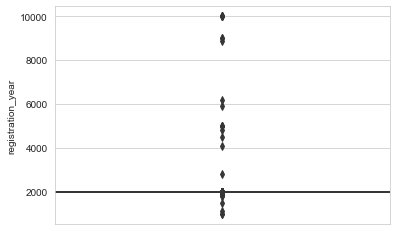

In [27]:
import seaborn as sns
sns.set_style("whitegrid") 
sns_plot = sns.boxplot(y = 'registration_year', data=autos, palette='colorblind', width=1000)
fig = sns_plot.get_figure()
fig.savefig("regboxplot.png")

In [28]:
autos.loc[autos['registration_year'] < 1900, 'registration_year'] = np.nan
autos.loc[autos['registration_year'] > 2016, 'registration_year'] = np.nan
reg_count = autos['registration_year'].value_counts()
reg_count.sort_index().head(5)

1910.0    9
1927.0    1
1929.0    1
1931.0    1
1934.0    2
Name: registration_year, dtype: int64

In [29]:
autos = autos.dropna(axis=0)
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33840 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_crawled        33840 non-null  object 
 1   name                33840 non-null  object 
 2   seller              33840 non-null  object 
 3   offer_type          33840 non-null  object 
 4   price               33840 non-null  float64
 5   abtest              33840 non-null  object 
 6   vehicle_type        33840 non-null  object 
 7   registration_year   33840 non-null  float64
 8   gearbox             33840 non-null  object 
 9   power_ps            33840 non-null  int64  
 10  model               33840 non-null  object 
 11  odometer_km         33840 non-null  float64
 12  registration_month  33840 non-null  int64  
 13  fuel_type           33840 non-null  object 
 14  brand               33840 non-null  object 
 15  unrepaired_damage   33840 non-null  object 
 16  ad_c

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004.0,manuell,158,andere,150000.0,3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06
1,2016-04-04,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997.0,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009.0,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007.0,automatik,71,fortwo,70000.0,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15
4,2016-04-01,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003.0,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01


In [30]:
brands = autos['brand'].value_counts(normalize=True, dropna=False).sort_values(ascending=False)
print(brands[:10])

volkswagen       0.206619
bmw              0.118499
mercedes_benz    0.104669
opel             0.100148
audi             0.093056
ford             0.065514
renault          0.043765
peugeot          0.029492
fiat             0.022843
seat             0.018794
Name: brand, dtype: float64


{'volkswagen': 6417.993278032037, 'bmw': 9161.355610972569, 'mercedes_benz': 9439.892715979673, 'opel': 3576.340808498082, 'audi': 10582.129882502382, 'ford': 4556.487595850248}


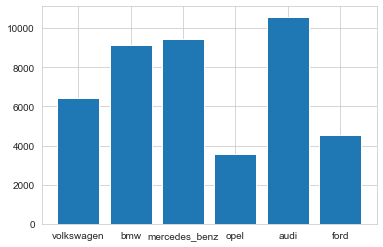

In [31]:
import matplotlib.pyplot as plt
top_brands = {}
brands = ['volkswagen', 'bmw', 'mercedes_benz', 'opel', 'audi', 'ford']
for b in brands:
 selected_rows = autos[autos['brand'] == b]
 bmean = selected_rows['price'].mean()
 top_brands[b] = bmean
print(top_brands)
plt.bar(*zip(*top_brands.items()))
plt.savefig('model_dist.png', dpi=300, bbox_inches='tight')
plt.show()

<BarContainer object of 6 artists>

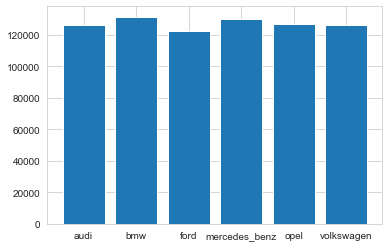

In [32]:
top_brands_km = {}
brands = ['audi', 'bmw', 'ford', 'mercedes_benz', 'opel', 'volkswagen']
for b in brands:
 selected_rows = autos[autos['brand'] == b]
 bmeankm = selected_rows['odometer_km'].mean()
 top_brands_km[b] = bmeankm
plt.bar(*zip(*top_brands_km.items()))

In [33]:

top_brands = pd.Series(top_brands)
top_brands_km = pd.Series(top_brands_km)

# Converting first series to DataFrame
top_brands_df = pd.DataFrame(top_brands, columns=['mean_price'])

# Assinging other series as new column in the `top_brands_df` dataframe
top_brands_df['mean_km'] = 0
top_brands_df.loc[:,'mean_km'] = top_brands_km

top_brands_df

,mean_price,mean_km
volkswagen,6417.993278,126015.446224
bmw,9161.355611,131526.184539
mercedes_benz,9439.892716,129841.897233
opel,3576.340808,127000.590145
audi,10582.129883,126308.351858
ford,4556.487596,122417.681552
